In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle

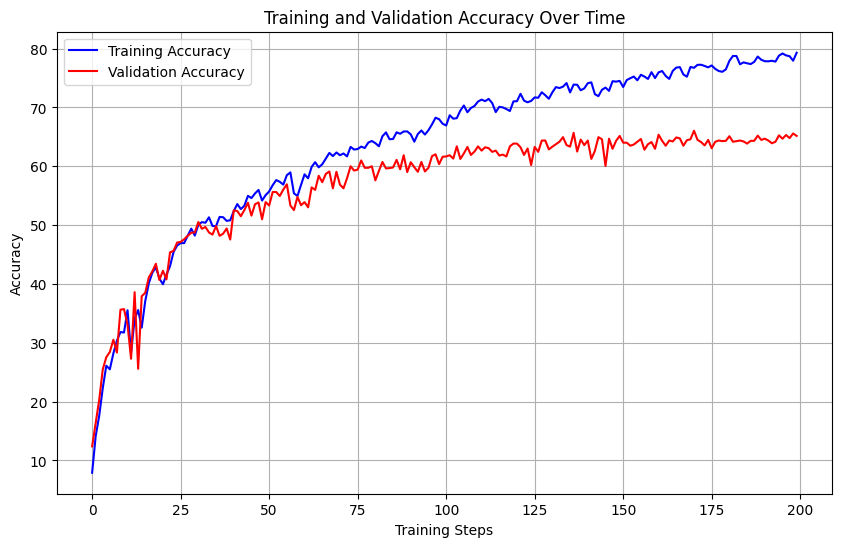

In [95]:
train_acc = pd.read_csv('train_acc.csv')
test_acc = pd.read_csv('val_acc.csv')
plt.figure(figsize=(10, 6))
plt.plot(train_acc['Step'], train_acc['Value'], label='Training Accuracy', color='blue')
plt.plot(test_acc['Step'], test_acc['Value'], label='Validation Accuracy', color='red')
plt.xlabel('Training Steps')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.legend()
plt.grid(True)
plt.show()

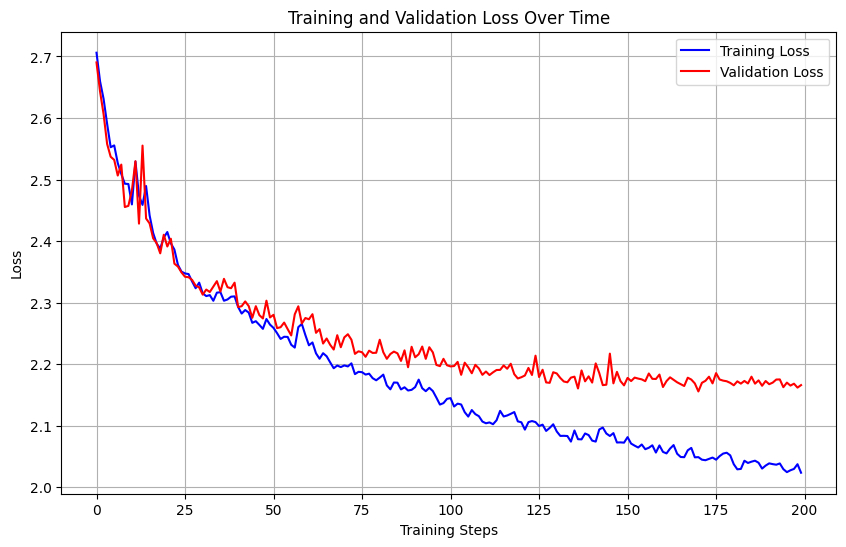

In [96]:
train_loss = pd.read_csv('train_loss.csv')
test_loss = pd.read_csv('val_loss.csv')
plt.figure(figsize=(10, 6))
plt.plot(train_loss['Step'], train_loss['Value'], label='Training Loss', color='blue')
plt.plot(test_loss['Step'], test_loss['Value'], label='Validation Loss', color='red')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
def eval(prediction, y_test, title, label_encoder):
    accuracy = accuracy_score(y_test, prediction)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, prediction, average='macro')
    confusion_mat = confusion_matrix(y_test, prediction)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw={'width_ratios': [2, 1]})
    
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_ylabel('Actual')
    ax1.set_xlabel('Predicted')
    
    # Create label encoding table
    ax2.axis('off')
    label_mapping = [[str(i), label] for i, label in enumerate(label_encoder.classes_)]
    label_table = ax2.table(cellText=label_mapping,
                          colLabels=['Encoded', 'Label'],
                          loc='center',
                          cellLoc='center',
                          colWidths=[0.2, 0.3])
    label_table.auto_set_font_size(False)
    label_table.set_fontsize(16)
    label_table.scale(1.2, 2)
    
    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")


/opt/anaconda3/envs/pytorch2.0/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


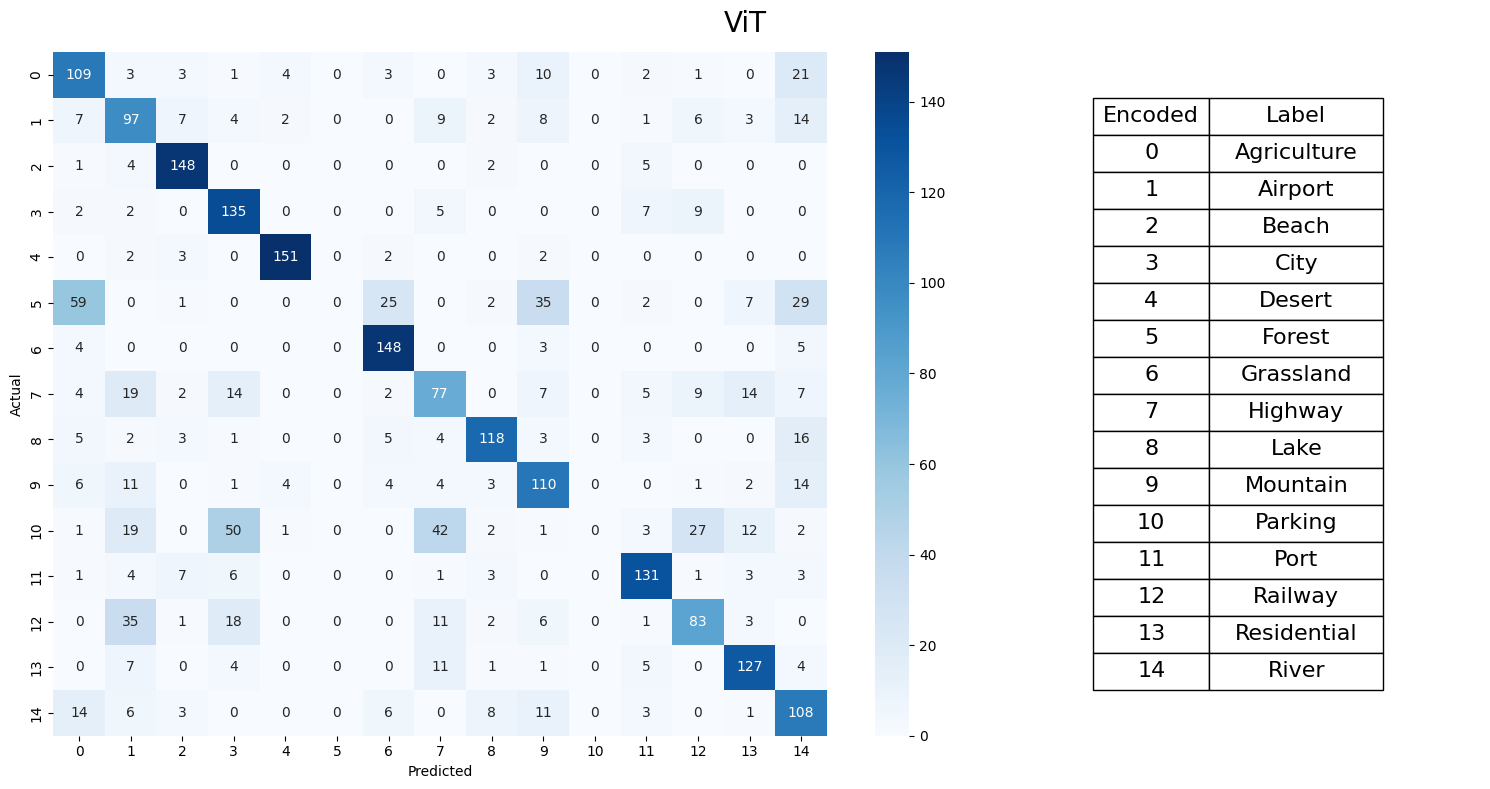

Accuracy: 0.6425
Precision: 0.5677
Recall: 0.6425
F1 Score: 0.5993


In [98]:
results = pd.read_csv('predictions.csv')
results['y_hat'] = results['y_hat'].astype(int)
results['y'] = results['y'].astype(int)

with open('le.pkl', 'rb') as f:
    le = pickle.load(f)

eval(results['y_hat'], results['y'], 'ViT', le)